#Boosting Techniques | Assignment

#

#Question 1:  What is Boosting in Machine Learning? Explain how it improves weak learners.

-->
## What is Boosting in Machine Learning?

**Boosting** is an **ensemble learning technique** that combines **multiple weak learners** to create a **strong learner**.

* A **weak learner** is a model that performs slightly better than random guessing (e.g., a shallow decision tree).
* Boosting **trains models sequentially**, where each new model **focuses on the mistakes of the previous models**.
* The final prediction is made by **combining all the weak learners**, usually with a weighted vote (classification) or weighted sum (regression).

---

## How Boosting Improves Weak Learners

1. **Sequential Training**

   * Each weak learner is trained on a dataset **weighted toward the errors of previous learners**.
   * Misclassified samples get **higher importance**.

2. **Weighted Voting**

   * Each weak learner contributes to the final prediction based on its **accuracy**.
   * Better learners have **more influence**.

3. **Error Reduction**

   * Boosting reduces both **bias** and sometimes **variance**, depending on the algorithm.

---

## Common Boosting Algorithms

* **AdaBoost (Adaptive Boosting)**
* **Gradient Boosting**
* **XGBoost**
* **LightGBM / CatBoost**

---

## Intuition Example

* Imagine a test where a weak student solves **slightly better than random**.
* Boosting is like giving this student **additional practice focused on questions they got wrong**, gradually improving their overall performance.

---

## Key Advantages

✔ Converts **weak learners into a strong learner**
✔ Often achieves **high predictive accuracy**
✔ Can model **complex relationships**

---

## Key Limitations

✘ Sensitive to **outliers**
✘ Can **overfit** if not properly regularized
✘ Slower than Bagging (sequential training)




#Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

-->
## Difference Between AdaBoost and Gradient Boosting

Both **AdaBoost** and **Gradient Boosting** are **sequential boosting algorithms**, but they differ in **how they focus on errors** and **train models**.

---

### 1. **AdaBoost (Adaptive Boosting)**

* **Error Focus:**

  * Adjusts **weights of the training samples** after each iteration.
  * Misclassified samples get **higher weights** so the next weak learner focuses on them.

* **How Models Are Trained:**

  * Each weak learner is trained on the **weighted dataset**.
  * The **final prediction** is a **weighted vote** of all weak learners based on their accuracy.

* **Key Idea:**

  * Correct the mistakes of previous learners by **reweighting samples**.

---

### 2. **Gradient Boosting**

* **Error Focus:**

  * Trains each new learner to predict the **residuals (errors) of the previous model**.
  * Uses **gradient descent** to minimize a **loss function** (e.g., MSE for regression, log-loss for classification).

* **How Models Are Trained:**

  * Each weak learner is trained on the **residual errors** of the previous learners.
  * The final prediction is the **sum of predictions of all learners**, often with a learning rate factor.

* **Key Idea:**

  * **Optimize a loss function directly** by fitting models to the negative gradient of the loss.

---

### Side-by-Side Comparison

| Aspect                  | AdaBoost                        | Gradient Boosting                                |
| ----------------------- | ------------------------------- | ------------------------------------------------ |
| Focus                   | Reweights misclassified samples | Fits residuals (errors) via gradient descent     |
| Model Training          | Weighted dataset                | Residuals of previous model                      |
| Final Prediction        | Weighted vote                   | Sum of predictions (possibly with learning rate) |
| Loss Function           | Implicit (classification error) | Explicit (any differentiable loss function)      |
| Sensitivity to Outliers | High                            | High (but can tune with loss/learning rate)      |

---

### Intuition

* **AdaBoost:** “Pay more attention to samples you got wrong.”
* **Gradient Boosting:** “Try to correct the **actual error** of the previous model using gradient descent.”




#Question 3: How does regularization help in XGBoost?

-->

## How Regularization Helps in XGBoost

**XGBoost** (Extreme Gradient Boosting) is a gradient boosting algorithm that includes **built-in regularization** to prevent **overfitting** and improve generalization.

---

### 1. Regularization in XGBoost

XGBoost adds a **penalty term** to the objective function:

[
\text{Objective} = \text{Loss Function} + \Omega(\text{Tree})
]

Where the regularization term (\Omega(\text{Tree})) is:

[
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_j w_j^2
]

* **T** → number of leaves in the tree
* **w_j** → score on leaf j
* **γ (gamma)** → penalizes **complex trees** (more leaves)
* **λ (lambda)** → penalizes **large leaf weights**

---

### 2. How It Helps

1. **Prevents Overfitting**

   * Penalizes overly complex trees (too many leaves or extreme leaf values)
   * Keeps the model simpler and more generalizable

2. **Controls Tree Complexity**

   * Balances **bias and variance**
   * Allows building **strong yet robust learners**

3. **Improves Generalization**

   * Regularization makes XGBoost **perform well on unseen data**
   * Reduces sensitivity to noisy data

---

### 3. Hyperparameters in XGBoost for Regularization

| Parameter          | Purpose                                                                    |
| ------------------ | -------------------------------------------------------------------------- |
| `lambda`           | L2 regularization on leaf weights                                          |
| `alpha`            | L1 regularization on leaf weights                                          |
| `gamma`            | Minimum loss reduction required to make a split (controls tree growth)     |
| `max_depth`        | Limits tree depth to avoid over-complexity                                 |
| `min_child_weight` | Minimum sum of instance weight in a child (prevents splits on small nodes) |

---

### Intuition

* Think of regularization as **adding a “cost” for complexity**.
* XGBoost doesn’t just fit the data—it **prefers simpler, smoother models** that generalize better.


Question 4: Why is CatBoost considered efficient for handling categorical data?

-->
## Why CatBoost is Efficient for Handling Categorical Data

**CatBoost** (Categorical Boosting) is a gradient boosting algorithm that **natively handles categorical features** without the need for extensive preprocessing like one-hot encoding.

---

### 1. Native Categorical Feature Support

* You can pass **categorical columns directly** to CatBoost
* It automatically applies **special encoding techniques** during training
* No need for **manual label encoding or one-hot encoding**, which:

  * Saves memory
  * Prevents explosion of feature dimensions for high-cardinality categories

---

### 2. Efficient Encoding Using “Ordered Target Statistics”

* CatBoost replaces categories with **smoothed averages of the target variable**
* Uses **ordered boosting** to avoid **target leakage**, which happens when the model sees future information during training
* This maintains **accuracy and unbiased learning**

---

### 3. Handles High-Cardinality Features Well

* Algorithms like XGBoost or LightGBM require **one-hot encoding**, which becomes inefficient for features with many categories (e.g., 100+ cities)
* CatBoost **avoids this**, reducing:

  * Memory usage
  * Computational cost
  * Risk of overfitting

---

### 4. Additional Efficiency Features

* Optimized **GPU training** for large datasets
* Reduces preprocessing steps, making the **end-to-end workflow faster**

---

### Intuition

* Think of CatBoost as:

  > “I can take your city, gender, or product type as-is, and I’ll encode it smartly so the model can learn patterns efficiently, without creating thousands of dummy columns.”



#Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

-->

## Real-World Applications Where Boosting is Preferred Over Bagging

**Boosting** is preferred over bagging when:

* You need **high predictive accuracy**
* The dataset has **complex patterns or non-linear relationships**
* Reducing **bias** is more important than reducing variance

---

### 1. **Finance and Banking**

* **Credit scoring & loan default prediction**
* **Fraud detection**
  **Why Boosting?**
* Captures **subtle patterns** in transactional data
* Focuses on **hard-to-classify cases** like rare fraudulent transactions

---

### 2. **Marketing & Customer Analytics**

* **Churn prediction** (which customers will leave)
* **Customer segmentation** for targeted offers
  **Why Boosting?**
* Handles **imbalanced datasets** (few churned vs many retained)
* Improves accuracy on **difficult-to-predict customers**

---

### 3. **Healthcare & Medical Diagnosis**

* **Disease prediction** (e.g., cancer detection, diabetes risk)
* **Medical image classification**
  **Why Boosting?**
* Captures **complex non-linear relationships** between patient features
* Sequential learning reduces **bias in weak predictors**

---

### 4. **E-commerce & Recommendation Systems**

* **Product recommendation**
* **Demand forecasting**
  **Why Boosting?**
* Learns **subtle user-item interactions**
* Works well for datasets with **mixed features** (numeric + categorical)

---

### 5. **Text and NLP Applications**

* **Spam detection**
* **Sentiment analysis**
* **Topic classification**
  **Why Boosting?**
* Handles **sparse, high-dimensional text data**
* Focuses on **hard-to-classify texts**

---

### Key Takeaway

> **Boosting is preferred over bagging when we need maximum predictive accuracy and want to reduce bias by sequentially focusing on difficult cases, especially in structured or complex datasets.**


In [1]:
#Question 6: Write a Python program to:
#● Train an AdaBoost Classifier on the Breast Cancer dataset
#● Print the model accuracy
#(Include your Python code and output in the code box below.)
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train AdaBoost Classifier
ab = AdaBoostClassifier(
    n_estimators=100,        # Number of weak learners
    learning_rate=0.1,       # Shrinkage factor
    random_state=42
)
ab.fit(X_train, y_train)

# Make predictions
y_pred = ab.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of AdaBoost Classifier:", accuracy)


Accuracy of AdaBoost Classifier: 0.9590643274853801


In [2]:
#Question 7:  Write a Python program to:
#● Train a Gradient Boosting Regressor on the California Housing dataset
#● Evaluate performance using R-squared score
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=200,       # Number of boosting rounds
    learning_rate=0.1,      # Step size shrinkage
    max_depth=4,            # Maximum depth of trees
    random_state=42
)
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score of Gradient Boosting Regressor:", r2)


R-squared score of Gradient Boosting Regressor: 0.8235291005094919


In [3]:
#Question 8: Write a Python program to:
#● Train an XGBoost Classifier on the Breast Cancer dataset
#● Tune the learning rate using GridSearchCV
#● Print the best parameters and accuracy
# Import required libraries
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Define XGBoost Classifier
xgb = XGBClassifier(
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,  # Suppress warning
    eval_metric='logloss'     # Required for recent XGBoost versions
)

# Define hyperparameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy'
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Predict on test set using best estimator
y_pred = grid_search.best_estimator_.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Hyperparameters:", best_params)
print("Final Test Accuracy:", final_accuracy)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:01:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:01:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:01:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:01:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:01:30] WARNING: /w

Best Hyperparameters: {'learning_rate': 0.3}
Final Test Accuracy: 0.9649122807017544


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:01:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


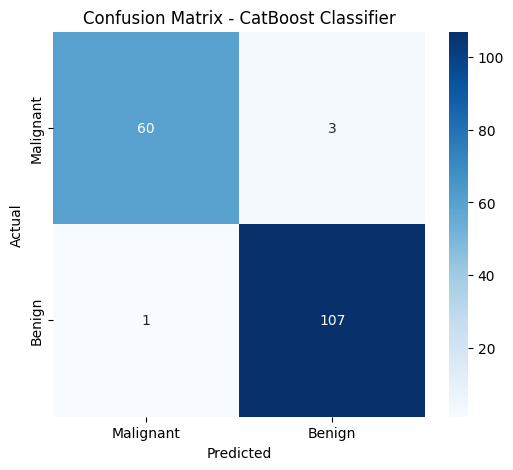

In [5]:
#Question 9: Write a Python program to:
#● Train a CatBoost Classifier
#● Plot the confusion matrix using seaborn
# Install CatBoost if not already installed
!pip install catboost

# Import required libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train CatBoost Classifier
catboost_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=4,
    random_seed=42,
    verbose=0  # Suppress training output
)
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred = catboost_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant','Benign'], yticklabels=['Malignant','Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()

#Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model
(Include your Python code and output in the code box below.)

-->
# Step-by-Step Data Science Pipeline for Loan Default Prediction Using Boosting

---

## **1. Data Preprocessing**

1. **Handle Missing Values**

   * Numerical features → Impute with **mean/median**
   * Categorical features → Impute with **mode** or **“missing” category**

2. **Handle Categorical Features**

   * **CatBoost**: native categorical handling
   * **XGBoost / AdaBoost**: encode categorical variables using **one-hot** or **label encoding**

3. **Feature Scaling**

   * Not required for tree-based models (Boosting works fine without scaling)

4. **Handle Imbalanced Classes**

   * Use **SMOTE**, **RandomOverSampler**, or **class weights** in boosting models

---

## **2. Choice of Boosting Algorithm**

| Algorithm | Strengths                                    | When to Use                              |
| --------- | -------------------------------------------- | ---------------------------------------- |
| AdaBoost  | Simple, sequential, good for small datasets  | Slightly imbalanced, clean data          |
| XGBoost   | Fast, regularization, handles missing values | Large, structured datasets               |
| CatBoost  | Handles categorical features natively        | Datasets with many categorical variables |

**Decision:**

* For mixed numeric + categorical + missing values → **CatBoost is most efficient**
* Supports **class weights** for imbalance

---

## **3. Hyperparameter Tuning Strategy**

* Use **GridSearchCV** or **RandomizedSearchCV**
* Key parameters to tune:

  * `learning_rate` → smaller for better generalization
  * `depth` → tree depth
  * `iterations` → number of boosting rounds
  * `l2_leaf_reg` → regularization
  * `border_count` (CatBoost) → categorical feature encoding granularity

---

## **4. Evaluation Metrics**

* **ROC-AUC** → sensitive to imbalanced data, measures ranking quality
* **F1-score** → balances precision and recall, important for financial risk
* **Confusion Matrix** → interpret misclassification patterns
* **Precision-Recall Curve** → especially if **default class is rare**

---

## **5. Business Benefits**

* Accurate prediction of **loan default** → reduces financial losses
* Prioritization of **high-risk customers** → enables targeted interventions
* Automates **decision-making** → faster credit approvals
* Insights into **important risk factors** → improves lending policies



Accuracy: 0.9816666666666667
ROC-AUC: 0.9949591149591149


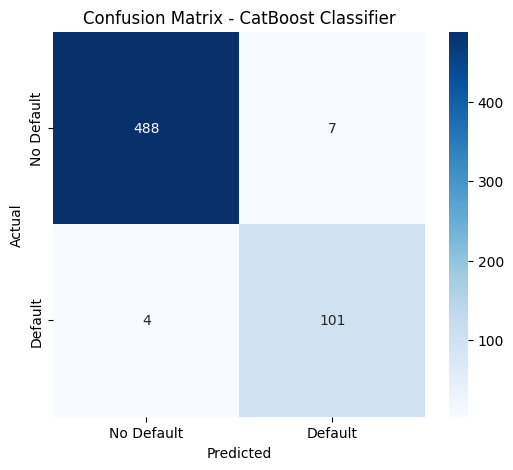

In [6]:
# Import libraries
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Generate synthetic dataset
X, y = make_classification(
    n_samples=2000, n_features=10, n_informative=7, n_redundant=2,
    n_clusters_per_class=1, weights=[0.8,0.2], flip_y=0.01, random_state=42
)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train CatBoost Classifier
cat_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=4,
    l2_leaf_reg=3,
    random_seed=42,
    verbose=0
)
cat_model.fit(X_train_res, y_train_res)

# Make predictions
y_pred = cat_model.predict(X_test)
y_prob = cat_model.predict_proba(X_test)[:,1]

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default','Default'], yticklabels=['No Default','Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()
